In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import RidgeClassifier
import sklearn as sk

In [2]:
filename = "LA_AQS_2023.csv" 
pd.read_csv(filename)
df = pd.read_csv(filename) 

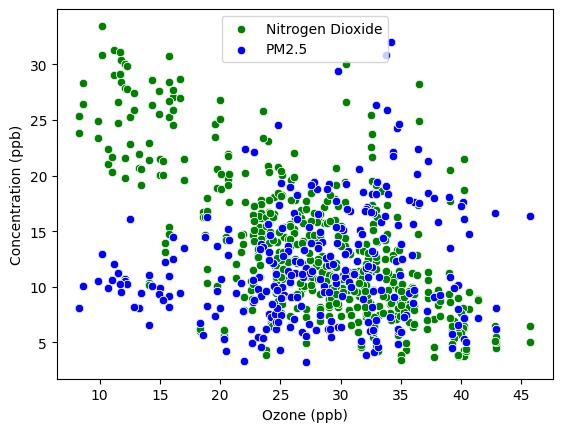

In [3]:
# Get data

# O3
df_o3 = df[(df['Parameter Name']== 'Ozone') & (df['Duration Description']== '1 HOUR')]
o3value = df_o3['Arithmetic Mean'] * 1000 #ppb
o3date = df_o3['Date (Local)']
df_1 = pd.DataFrame(data = {'Ozone':o3value, 'date': o3date})

# NO2
df_no2 = df[(df['Parameter Name']== 'Nitrogen dioxide (NO2)') & (df['Duration Description']== '1 HOUR')]
no2value = df_no2['Arithmetic Mean'] # ppb
no2date = df_no2['Date (Local)']
df_2 = pd.DataFrame(data = {'Nitrogen Dioxide (NO2)':no2value, 'date': no2date})

# PM2.5
df_pm25 = df[(df['Parameter Name']== 'PM2.5 - Local Conditions') & (df['Duration Description']== '1 HOUR')]
pm25value = df_pm25['Arithmetic Mean'] # ppb
pm25date = df_pm25['Date (Local)']
df_3 = pd.DataFrame(data = {'PM2.5 - Local Conditions':pm25value, 'date': pm25date})

# Merge Data
df_12 = df_1.merge(df_2,on=['date'])
df_13 = df_1.merge(df_3, on = ['date'])
df_all = df_12.merge(df_3,on = ['date'])

# Scatter Plot
sPlot1 = sns.scatterplot(data = df_all, y = 'Nitrogen Dioxide (NO2)', x = 'Ozone', color = 'green', label = 'Nitrogen Dioxide')
sPlot1.set(ylabel ="Concentration (ppb)", xlabel = "Ozone (ppb)")
sPlot1 = sPlot1 = sns.scatterplot(data = df_all, y = 'PM2.5 - Local Conditions', x = 'Ozone', color = 'blue', label = 'PM2.5')
sPlot1.legend()


In [4]:
# NO2 vs O3 vs PM2.5 summer months
sumMonths = pd.DatetimeIndex(df_all['date']).month.values
sIdx = sumMonths - sumMonths #Set values (including winter) to zero
sIdx[sumMonths == 6] = 1 #Set summer to 1
sIdx[sumMonths == 7] = 1
sIdx[sumMonths == 8] = 1

sIdx[sumMonths == 3] = -1 #Set spring to -1
sIdx[sumMonths == 4] = -1
sIdx[sumMonths == 5] = -1

sIdx[sumMonths == 9] = -1 #Set fall to -1
sIdx[sumMonths == 10] = -1
sIdx[sumMonths == 11] = -1

df_all['summer'] = sIdx

# Remove summer
df_all = df_all[df_all['summer'] > -1]

X = np.column_stack((df_all['Ozone'], df_all['Nitrogen Dioxide (NO2)'], df_all['PM2.5 - Local Conditions']))
y = df_all['summer'].to_numpy()

In [9]:
# 60%, 20% , 20% split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

## Ridge Classifier
for i in np.arange(0, 1.1, 0.01):
    # 1) fit on training data then score your training data 
    classifer1 = RidgeClassifier(alpha=i) 
    classifer1.fit(X_train, y_train)
    print("Train/train score = ", classifer1.score(X_train, y_train), "alpha = ", i)


    # 2) fit on training data then score on validation
    classifer2 = RidgeClassifier(alpha=i) 
    classifer2.fit(X_train, y_train)
    print("Train/validattion score = ", classifer2.score(X_val, y_val), "alpha = ", i)

    # 3) fit on train data, score on test
    classifer3 = RidgeClassifier(alpha=i) 
    classifer3.fit(X_train, y_train)
    print("Train/test score = ", classifer3.score(X_test, y_test), "alpha = ", i)
    print('')



Train/train score =  0.8784530386740331 alpha =  0.0
Train/validattion score =  0.8347107438016529 alpha =  0.0
Train/test score =  0.8347107438016529 alpha =  0.0

Train/train score =  0.8784530386740331 alpha =  0.01
Train/validattion score =  0.8347107438016529 alpha =  0.01
Train/test score =  0.8347107438016529 alpha =  0.01

Train/train score =  0.8784530386740331 alpha =  0.02
Train/validattion score =  0.8347107438016529 alpha =  0.02
Train/test score =  0.8347107438016529 alpha =  0.02

Train/train score =  0.8784530386740331 alpha =  0.03
Train/validattion score =  0.8347107438016529 alpha =  0.03
Train/test score =  0.8347107438016529 alpha =  0.03

Train/train score =  0.8784530386740331 alpha =  0.04
Train/validattion score =  0.8347107438016529 alpha =  0.04
Train/test score =  0.8347107438016529 alpha =  0.04

Train/train score =  0.8784530386740331 alpha =  0.05
Train/validattion score =  0.8347107438016529 alpha =  0.05
Train/test score =  0.8347107438016529 alpha =  0

In [6]:
# 80%, 10% , 10% split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5)

## Ridge Classifier
for i in np.arange(0, 1.1, 0.1):
    # 1) fit on training data then score your training data 
    classifer1 = RidgeClassifier(alpha=i) 
    classifer1.fit(X_train, y_train)
    print("Train/train score = ", classifer1.score(X_train, y_train), "alpha = ", i)


    # 2) fit on training data then score on validation
    classifer2 = RidgeClassifier(alpha=i) 
    classifer2.fit(X_train, y_train)
    print("Train/validattion score = ", classifer2.score(X_val, y_val), "alpha = ", i)

    # 3) fit on train data, score on test
    classifer3 = RidgeClassifier(alpha=i) 
    classifer3.fit(X_train, y_train)
    print("Train/test score = ", classifer3.score(X_test, y_test), "alpha = ", i)
    print('')


Train/train score =  0.8671586715867159 alpha =  0.0
Train/validattion score =  0.8455882352941176 alpha =  0.0
Train/test score =  0.8032786885245902 alpha =  0.0

Train/train score =  0.8671586715867159 alpha =  0.1
Train/validattion score =  0.8455882352941176 alpha =  0.1
Train/test score =  0.8032786885245902 alpha =  0.1

Train/train score =  0.8671586715867159 alpha =  0.2
Train/validattion score =  0.8455882352941176 alpha =  0.2
Train/test score =  0.8032786885245902 alpha =  0.2

Train/train score =  0.8671586715867159 alpha =  0.30000000000000004
Train/validattion score =  0.8455882352941176 alpha =  0.30000000000000004
Train/test score =  0.8032786885245902 alpha =  0.30000000000000004

Train/train score =  0.8671586715867159 alpha =  0.4
Train/validattion score =  0.8455882352941176 alpha =  0.4
Train/test score =  0.8032786885245902 alpha =  0.4

Train/train score =  0.8671586715867159 alpha =  0.5
Train/validattion score =  0.8455882352941176 alpha =  0.5
Train/test scor

In [7]:
# Cost function of ridge regression is the normalized sum of the individual loss functions 

# Varying the ridge penalty or 'alpha' does not affect the score of the training data
# or validation data

# Final model error
print('Ridge Regression Mean square error (MSE) = ', sk.metrics.mean_squared_error(y_test, classifer3.predict(X_test)))

# If I redo the validation/train split then the scores are similar, but not exactly the same

Ridge Regression Mean square error (MSE) =  0.19672131147540983


In [8]:
# Logistic Regression
log = sk.linear_model.LogisticRegression()
log.fit(X_train,y_train)
print( 'Logistic Regression MSE = ', sk.metrics.mean_squared_error(y_test,log.predict(X_test)))

# Logistic regression has smaller MSE, thus performs better.


Logistic Regression MSE =  0.13114754098360656
